# HNLCalc: Heavy Neutral Lepton Calculator

## Load Libraries

In [1]:
from HNLCalc import HNLCalc
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
import matplotlib
import math

## Initializing the HNL class

The `HNLCalc(ve,vmu,vtau)` class is initialized by specifying the coupling ratio $|U_e|: |U_\mu|: |U_\tau|$. The coupling is automatically normalized, i.e. 0:1:1: and 0:2:2 will net the same results. We define the overall normalization of the couplings by $\epsilon^2 \equiv |U_e|^2 + |U_\mu|^2 + |U_\tau|$.  


In [2]:
hnl = HNLCalc(ve=0, vmu=1, vtau=1)

## HNL production

HNLs can be produced through 2-body tau and pseudoscalar meson decays, $P \to l N$ and $\tau \to M N$, or through 3-body tau and pseudoscalar meson decays, $P \to P'lN, VlN$.

The complete list of channels that are implemented is: 

In [3]:
for channel in hnl.get_channels_2body(): print(channel[-1])
for channel in hnl.get_channels_3body(): print(channel[-1])

$D^+ \to \mu^+ + N$
$D^+ \to \tau^+ + N$
$D^- \to \mu^- + N$
$D^- \to \tau^- + N$
$D_s^+ \to \mu^+ + N$
$D_s^+ \to \tau^+ + N$
$D_s^- \to \mu^- + N$
$D_s^- \to \tau^- + N$
$B^+ \to + \mu^+ + N$
$B^+ \to + \tau^+ + N$
$B^- \to + \mu^- + N$
$B^- \to + \tau^- + N$
$B_c^+ \to + \mu^+ + N$
$B_c^+ \to + \tau^+ + N$
$B_c^- \to + \mu^- + N$
$B_c^- \to + \tau^- + N$
$\pi^+ \to + \mu^+ + N$
$\pi^+ \to + \tau^+ + N$
$\pi^- \to + \mu^- + N$
$\pi^- \to + \tau^- + N$
$K^+ \to + \mu^+ + N$
$K^+ \to + \tau^+ + N$
$K^- \to + \mu^- + N$
$K^- \to + \tau^- + N$
$\tau^- \to \pi^- + N$
$\tau^+ \to \pi^+ + N$
$\tau^- \to K^- + N$
$\tau^+ \to K^+ + N$
$\tau^- \to \rho^- + N$
$\tau^+ \to \rho^+ + N$
$\tau^- \to K^{*-} + N$
$\tau^+ \to K^{*+} + N$
$D^0 \to K^- + \mu^+ + N$
$D^0 \to K^- + \tau^+ + N$
$D^0 \to K^+ + \mu^- + N$
$D^0 \to K^+ + \tau^- + N$
$D^+ \to \bar{K}^0 + \mu^+ + N$
$D^+ \to \bar{K}^0 + \tau^+ + N$
$D^- \to K^0 + \mu^- + N$
$D^- \to K^0 + \tau^- + N$
$B^+ \to \bar{D}^0 + \mu^+ + N$
$B^+ \to \ba

For every production channel implemented, we provide the branching fraction as an evaluateable string that depends on the HNL `mass` and `coupling`, defined by $\epsilon^2 = |U_e|^2 + |U_\mu|^2 _ |U_\tau|^2$, using the functions `hnl.get_channels_2body()` and `hnl.get_channels_3body()` respectively. 

For the case of two body production, $A\to N B$, the function `hnl.get_channels_2body()` returns the array `[label, pid0, pid1, br, description]`, where `label` is the name of the production mode, `pid0` and `pid1` are the particle id numbers of the parent $A$ and outgoing particle $B$ respectively, the string `br` is the evaluateable **total branching fraction**, and `description` is the latex label for the production mode. 

For the case of three-body production, $A\to N B C$, the function `hnl.get_channels_3body()` returns the array `[label, pid0, pid1, pid2, br, integration, description]`, where `label` is the name of the production mode, `pid0`, `pid1`, and `pid2` are the particle id numbers of the parent $A$ and outgoing particles $B$ and $C$ respectively, the string `br` is the evaluateable **differential branching fraction**, `integration` denotes which integration variables that `br` is given in terms of, and `description` is the latex label for the production mode. 

Differential branching fractions are used for 3-body production since Monte-Carlo (MC) event generators need adequate information to sample over particle kinematics, rather than just computing the total rates. 

Here we print a few total and differential branching fractions as examples. 

In [4]:
print ("2body decay BR for "+hnl.get_channels_2body()[0][-1]+":\n")
print (hnl.get_channels_2body()[0][3])

2body decay BR for $D^+ \to \mu^+ + N$:

0.010349302057192708*coupling**2*mass**2*1.86966*(1.-(mass/1.86966)**2 + 2.*(0.10565837550000001/1.86966)**2 + (0.10565837550000001/mass)**2*(1.-(0.10565837550000001/1.86966)**2)) * np.sqrt((1.+(mass/1.86966)**2 - (0.10565837550000001/1.86966)**2)**2-4.*(mass/1.86966)**2)


In [5]:
print ("3body decay differential BR d^2sigma/dE/dq2 for "+hnl.get_channels_3body()[0][-1]+":\n")
print (hnl.get_channels_3body()[0][4])

3body decay differential BR d^2sigma/dE/dq2 for $D^0 \to K^- + \mu^+ + N$:

0.005836642048151988* coupling**2 *(((0.747/(1-q**2/1.96835**2)-0.747/(1-q**2/2.1122**2))*(1.86484**2-0.49367700000000003**2)/q**2)**2*(q**2*(mass**2+0.10565837550000001**2)-(mass**2-0.10565837550000001**2)**2)+(2*(0.747/(1-q**2/2.1122**2))*((0.747/(1-q**2/1.96835**2)-0.747/(1-q**2/2.1122**2))*(1.86484**2-0.49367700000000003**2)/q**2)*mass**2*(2*1.86484**2-2*0.49367700000000003**2-4*energy*1.86484-0.10565837550000001**2+mass**2+q**2)+(2*(0.747/(1-q**2/2.1122**2))*((0.747/(1-q**2/1.96835**2)-0.747/(1-q**2/2.1122**2))*(1.86484**2-0.49367700000000003**2)/q**2)*0.10565837550000001**2*(4*energy*1.86484+ 0.10565837550000001**2-mass**2-q**2)))+((0.747/(1-q**2/2.1122**2))**2*(4*energy*1.86484+0.10565837550000001**2-mass**2-q**2)*(2*1.86484**2-2*0.49367700000000003**2-4*energy*1.86484-0.10565837550000001**2+mass**2+q**2)+-(0.747/(1-q**2/2.1122**2))**2*(2*1.86484**2+2*0.49367700000000003**2-q**2)*(q**2-mass**2-0.10565837

In [6]:
print ("3body decay differential BR dsigma/dE for "+hnl.get_channels_3body()[-1][-1]+":\n")
print (hnl.get_channels_3body()[0][4])

3body decay differential BR dsigma/dE for $\tau^+ \to \mu^+ + \nu_\mu + N$:

0.005836642048151988* coupling**2 *(((0.747/(1-q**2/1.96835**2)-0.747/(1-q**2/2.1122**2))*(1.86484**2-0.49367700000000003**2)/q**2)**2*(q**2*(mass**2+0.10565837550000001**2)-(mass**2-0.10565837550000001**2)**2)+(2*(0.747/(1-q**2/2.1122**2))*((0.747/(1-q**2/1.96835**2)-0.747/(1-q**2/2.1122**2))*(1.86484**2-0.49367700000000003**2)/q**2)*mass**2*(2*1.86484**2-2*0.49367700000000003**2-4*energy*1.86484-0.10565837550000001**2+mass**2+q**2)+(2*(0.747/(1-q**2/2.1122**2))*((0.747/(1-q**2/1.96835**2)-0.747/(1-q**2/2.1122**2))*(1.86484**2-0.49367700000000003**2)/q**2)*0.10565837550000001**2*(4*energy*1.86484+ 0.10565837550000001**2-mass**2-q**2)))+((0.747/(1-q**2/2.1122**2))**2*(4*energy*1.86484+0.10565837550000001**2-mass**2-q**2)*(2*1.86484**2-2*0.49367700000000003**2-4*energy*1.86484-0.10565837550000001**2+mass**2+q**2)+-(0.747/(1-q**2/2.1122**2))**2*(2*1.86484**2+2*0.49367700000000003**2-q**2)*(q**2-mass**2-0.1056583

Here we evaluate and plot some 2-body production branching fractions for a given range of masses and unit coupling $\epsilon=1$.

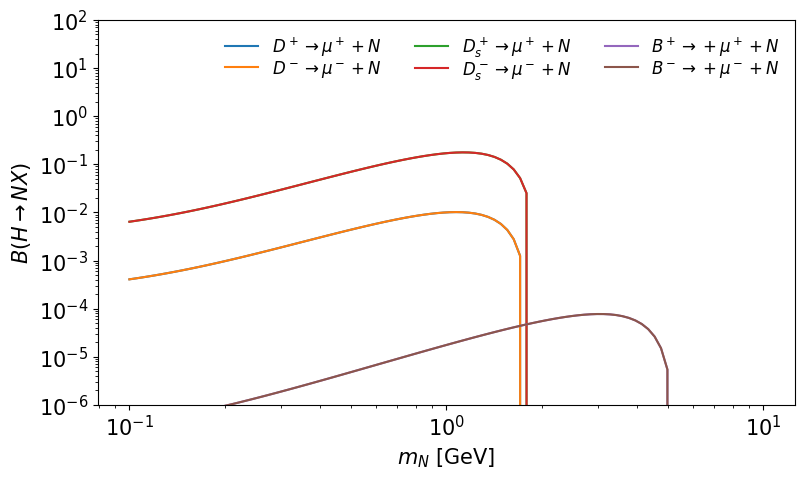

In [7]:
# get subset of channels
production_channels_2body = hnl.get_channels_2body()[::2][:6]
masses, coupling = np.logspace(-1,1,100), 1

# get BR
branching_fractions, latex_labels  = {}, {}
for production_channel in production_channels_2body:
    label, pid0, pid1, br, latex_label = production_channel
    branching_fractions[label] = [eval(br) if mass<hnl.masses(pid0)-hnl.masses(pid1) else 0 for mass in masses]
    latex_labels[label] = latex_label
    
    
# plot
matplotlib.rcParams.update({'font.size': 15})
fig = plt.figure(figsize=(9,5))
for label in branching_fractions.keys():
    plt.plot(masses, branching_fractions[label], label=latex_labels[label]) 

plt.ylim(1e-6, 1e2)
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r'$m_N$ [GeV]')
plt.ylabel(r'$B(H \to N X)$')
plt.legend(frameon=False, labelspacing=0, ncol=3, fontsize=12, loc='upper right')
plt.show()

Likewise, we evaluate some 3-body production total branching fractions using the `hnl.integrate_3body_br` function to integrate over the differential branching fractions. 

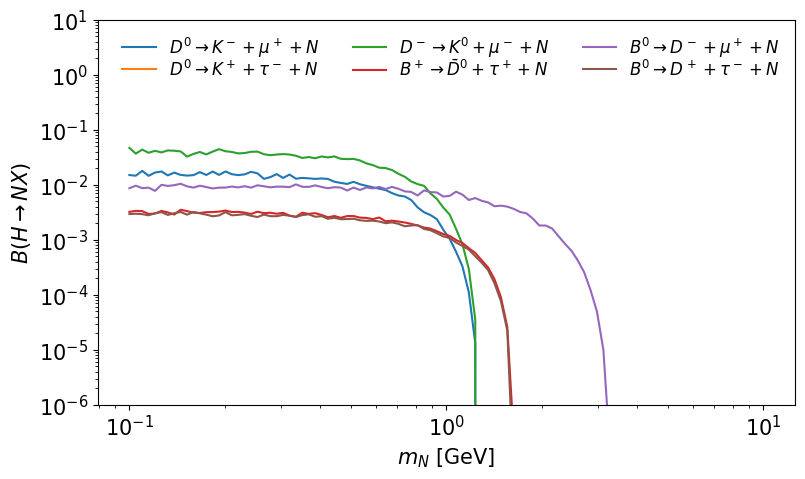

In [8]:
# get channels
production_channels_3body = hnl.get_channels_3body()[::3][:6]
masses, coupling = np.logspace(-1,1,100), 1

# get BR

branching_fractions, latex_labels  = {}, {}
for production_channel in production_channels_3body:
    label, pid0, pid1, pid2 , br, integration, latex_label = production_channel
    m0, m1, m2 = hnl.masses(pid0), hnl.masses(pid1), hnl.masses(pid2)
    branching_fractions[label] = [hnl.integrate_3body_br(
        br, mass, m0, m1, m2, integration=integration) for mass in masses]
    latex_labels[label] = latex_label
    
     
# plot
matplotlib.rcParams.update({'font.size': 15})
fig = plt.figure(figsize=(9,5))
for label in branching_fractions.keys():
    plt.plot(masses, branching_fractions[label], label=latex_labels[label]) 

plt.ylim(1e-6, 1e1)
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r'$m_N$ [GeV]')
plt.ylabel(r'$B(H \to N X)$')
plt.legend(frameon=False, labelspacing=0, ncol=3, fontsize=12, loc='upper right')
plt.show()
fig.savefig(f'HNL 3-Body Production.pdf',format='pdf',bbox_inches='tight')

## HNL Decay
HNLs can decay into purely leptonic finalstates, $\nu\, l_\alpha^+ l_\beta^-$ and $\nu\nu\nu$, or hadronic finalstates, $\nu H^0 $, $l^\pm H^\mp $, $\nu (\geq 3H)$ and $l^\pm(\geq 3H)$. The list of decay modes that are active in the defined model can be obtained via `hnl.decay_modes` as a list of tuples. The modes containing `'3had'`, refer to decays into 3 or more hadrons. 

In [9]:
print(f"Active Decay Modes:\n")
for mode in hnl.decay_modes:
       print(f"{mode}")

Active Decay Modes:

('nu', 'e', 'anti_e')
('nu', 'mu', 'anti_mu')
('nu', 'tau', 'anti_tau')
('e', 'anti_mu', 'nu')
('mu', 'anti_e', 'nu')
('e', 'anti_tau', 'nu')
('tau', 'anti_e', 'nu')
('mu', 'anti_tau', 'nu')
('tau', 'anti_mu', 'nu')
('nu', 'nu', 'nu')
('nu', 'pi0')
('nu', 'eta')
('nu', 'etap')
('mu', 'pi+')
('anti_mu', 'anti_pi+')
('mu', 'K+')
('anti_mu', 'anti_K+')
('mu', 'D+')
('anti_mu', 'anti_D+')
('mu', 'Ds+')
('anti_mu', 'anti_Ds+')
('tau', 'pi+')
('anti_tau', 'anti_pi+')
('tau', 'K+')
('anti_tau', 'anti_K+')
('tau', 'D+')
('anti_tau', 'anti_D+')
('tau', 'Ds+')
('anti_tau', 'anti_Ds+')
('nu', 'rho0')
('nu', 'omega')
('nu', 'phi')
('mu', 'rho+')
('anti_mu', 'anti_rho+')
('mu', 'K+star')
('anti_mu', 'anti_K+star')
('tau', 'rho+')
('anti_tau', 'anti_rho+')
('tau', 'K+star')
('anti_tau', 'anti_K+star')
('mu', '3had')
('anti_mu', '3had')
('tau', '3had')
('anti_tau', '3had')
('nu', '3had')


 The function `hnl.get_br_and_ctau()` is used to generate the HNL branching fractions and decay length $c\tau$ for the masses given by `mpts` and $\epsilon$ given by `coupling`. The branching fractions are saved as a dictionary `hnl.model_brs` which takes as a key the tuples given by `hnl.decay_modes` and the decay length $c\tau$ is saved to the `hnl.ctau` array. The branching fractions are also saved to the `model/br` folder as `.csv` tables, i.e. `('nu','pi0').csv`, and likewise, the $c\tau$ vs mass table is saved to the file`model/ctau/ctau.txt`. 

In [10]:
masses, coupling = np.logspace(-1,1, 401), 1e-3

hnl.get_br_and_ctau(mpts = masses,coupling = coupling)

If, for example, we wanted to access the branching fraction of the $\nu\pi^0$ mode for the first 50 mass points defined above, we can call the `model_brs` dictionary with: 

In [11]:
print(hnl.model_brs[('nu','pi0')][:50])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02183157097170849, 0.08252866124859462, 0.16434792164713152, 0.25191949457769264, 0.3355580245022244, 0.4106496663880471, 0.4758365381127808, 0.5314529060744098, 0.578541632122559, 0.618333353146433, 0.6520067856742415, 0.6805976183080894, 0.7049783912640524, 0.7258686995013565, 0.7438559619972273, 0.7594178431039387, 0.7729427227819923, 0.7847470818981941, 0.7950897412143884, 0.804183303616278, 0.8122032607196361, 0.8192952107856238, 0.8255805754674962]


Here we plot the relevant HNL decay branching fractions for the defined model. We split these into the neutral current mediated and charged current mediated channels.  

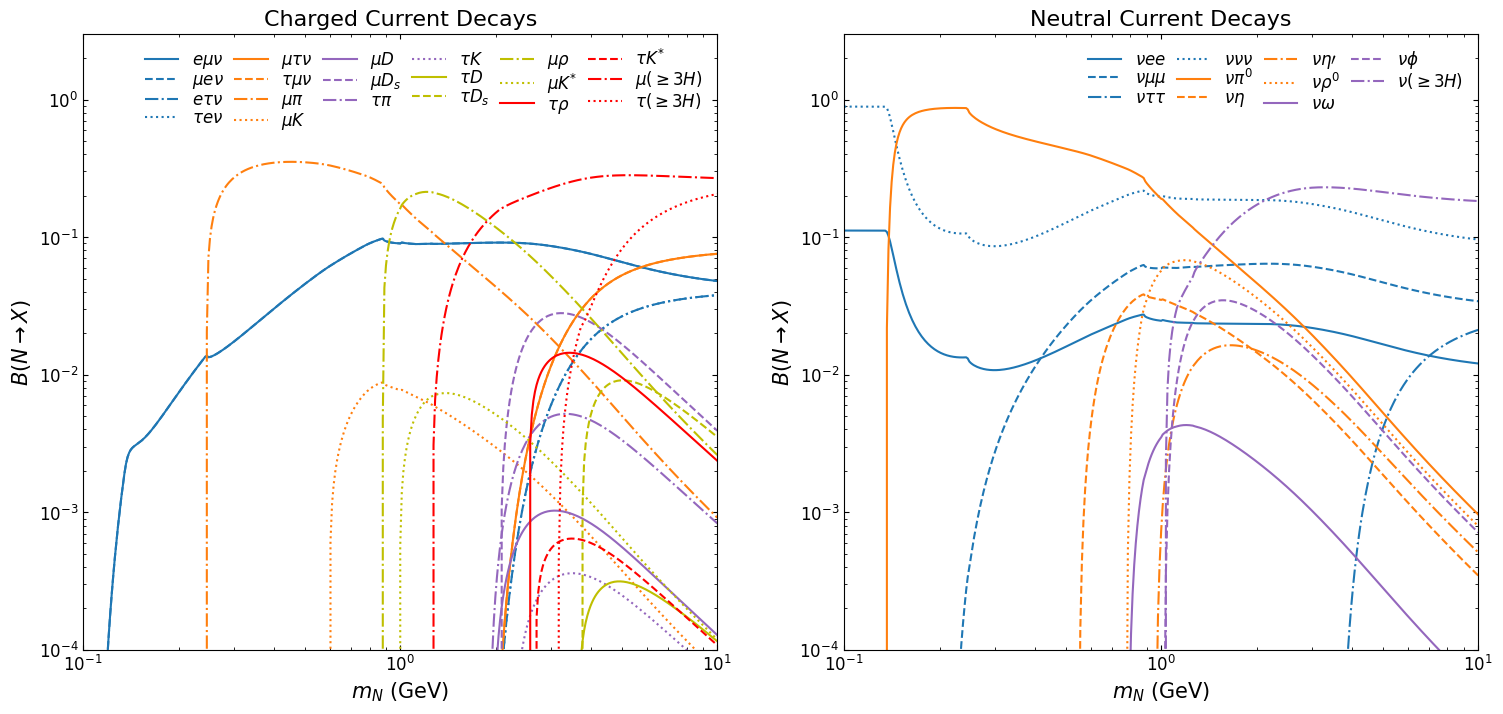

In [12]:
#setup figures
fig,(ax,ax1) = plt.subplots(1,2)

#define custom color cycler
custom_cycler = (cycler(color=['tab:blue','tab:orange','tab:purple', 'y', 'r','green','c'])* 
                 cycler(ls=['-', '--', '-.', 'dotted']))

ax.set_prop_cycle(custom_cycler)
ax1.set_prop_cycle(custom_cycler)

fig.set_size_inches(18,8, forward=True)

ax.set_title(r"Charged Current Decays",fontsize = 16)
ax1.set_title(r"Neutral Current Decays",fontsize = 16)

for a in [ax,ax1]:
    
    a.set(xscale = 'log', yscale = 'log',xlim=(1e-1,1e1),ylim = (1e-4,3))
   
    a.tick_params(axis='both', which='major',direction='in',top=True,right=True)
    
    a.tick_params(axis='both', which='minor',direction='in',top=True,right=True)
    
    a.set_xlabel(r"$m_N$ (GeV)",fontsize=15)
    a.set_ylabel(r"$B(N\to X)$",fontsize=15)
    a.tick_params(axis='x', labelsize=12)
    a.tick_params(axis='y', labelsize=12)

#plot model brs
for mode in hnl.decay_modes: 

    label = r"" 
    for p in mode: label += hnl.plot_labels_neut[p]

    if mode[0] == 'nu': ax1.plot(masses,hnl.model_brs[mode], label =label)
    
    elif mode[0] != 'nu' and 'anti_' not in mode[0]: ax.plot(masses,2*np.array(hnl.model_brs[mode]), label =label)


ax.legend(prop={'size': 12},loc='upper right',frameon=False,ncol=6,labelspacing=0,columnspacing = .65)
ax1.legend(prop={'size': 12},loc='upper right',frameon=False,ncol=4,labelspacing=0,columnspacing = .65)



fig.savefig(f'HNL Decay.pdf',format='pdf',bbox_inches='tight')

We can additionally plot the decay length via `hnl.ctau`. 

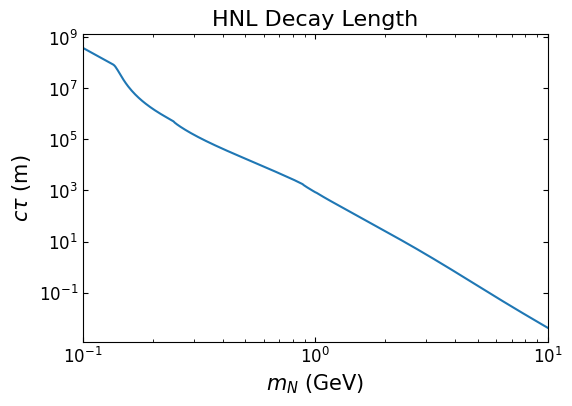

In [13]:
#setup figure
fig,ax = plt.subplots()
fig.set_size_inches(6,4, forward=True)

ax.set_title(r"HNL Decay Length",fontsize = 16)
ax.set(xscale = 'log', yscale = 'log',xlim=(1e-1,1e1))
ax.tick_params(axis='both', which='major',direction='in',top=True,right=True)
ax.tick_params(axis='both', which='minor',direction='in',top=True,right=True)
ax.set_xlabel(r"$m_N$ (GeV)",fontsize=15)
ax.set_ylabel(r"$c\tau$ (m)",fontsize=15)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

#plot ctau
ax.plot(masses,hnl.ctau)

fig.savefig(f'HNL ctau.pdf',format='pdf',bbox_inches='tight')